In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Final - Fall Semester 2016

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions (you can copy from the notes).
1. Do not use piazza for the duration of the exam, it will be frozen!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the final will result in a 10% reduction every HOUR that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE Tuesday (and more so before the exam starts).

Good luck!

## Question 1

Consider the BVP
$$
    u_{xx} = -\sin x
$$
with $u(0) = 0$ and $u(1) = 3$.

**(a)** [10] Discretize Poisson problem above using a second-order, centered difference method with $N = [32, 64, 128, 256]$ points and solve the resulting system of equations using the SOR method.  Compute the convergence to the true solution in the $\ell_2$ norm of the ODE and the $\ell_2$ norm of the difference between subsequent steps of the iteration count.  Plot both convergences vs. the iteration count on the same plot for $\omega = [1.8, \omega_{\text{opt}}, 1.9]$ where $\omega_{\text{opt}}$ is the optimal value presented in class for each of the values of $N$ (please organize your plots so they are easy to read (for instance in a properly sized $3 \times 4$ grid).  Instead of computing the expected number of iterations always take 300 instead.

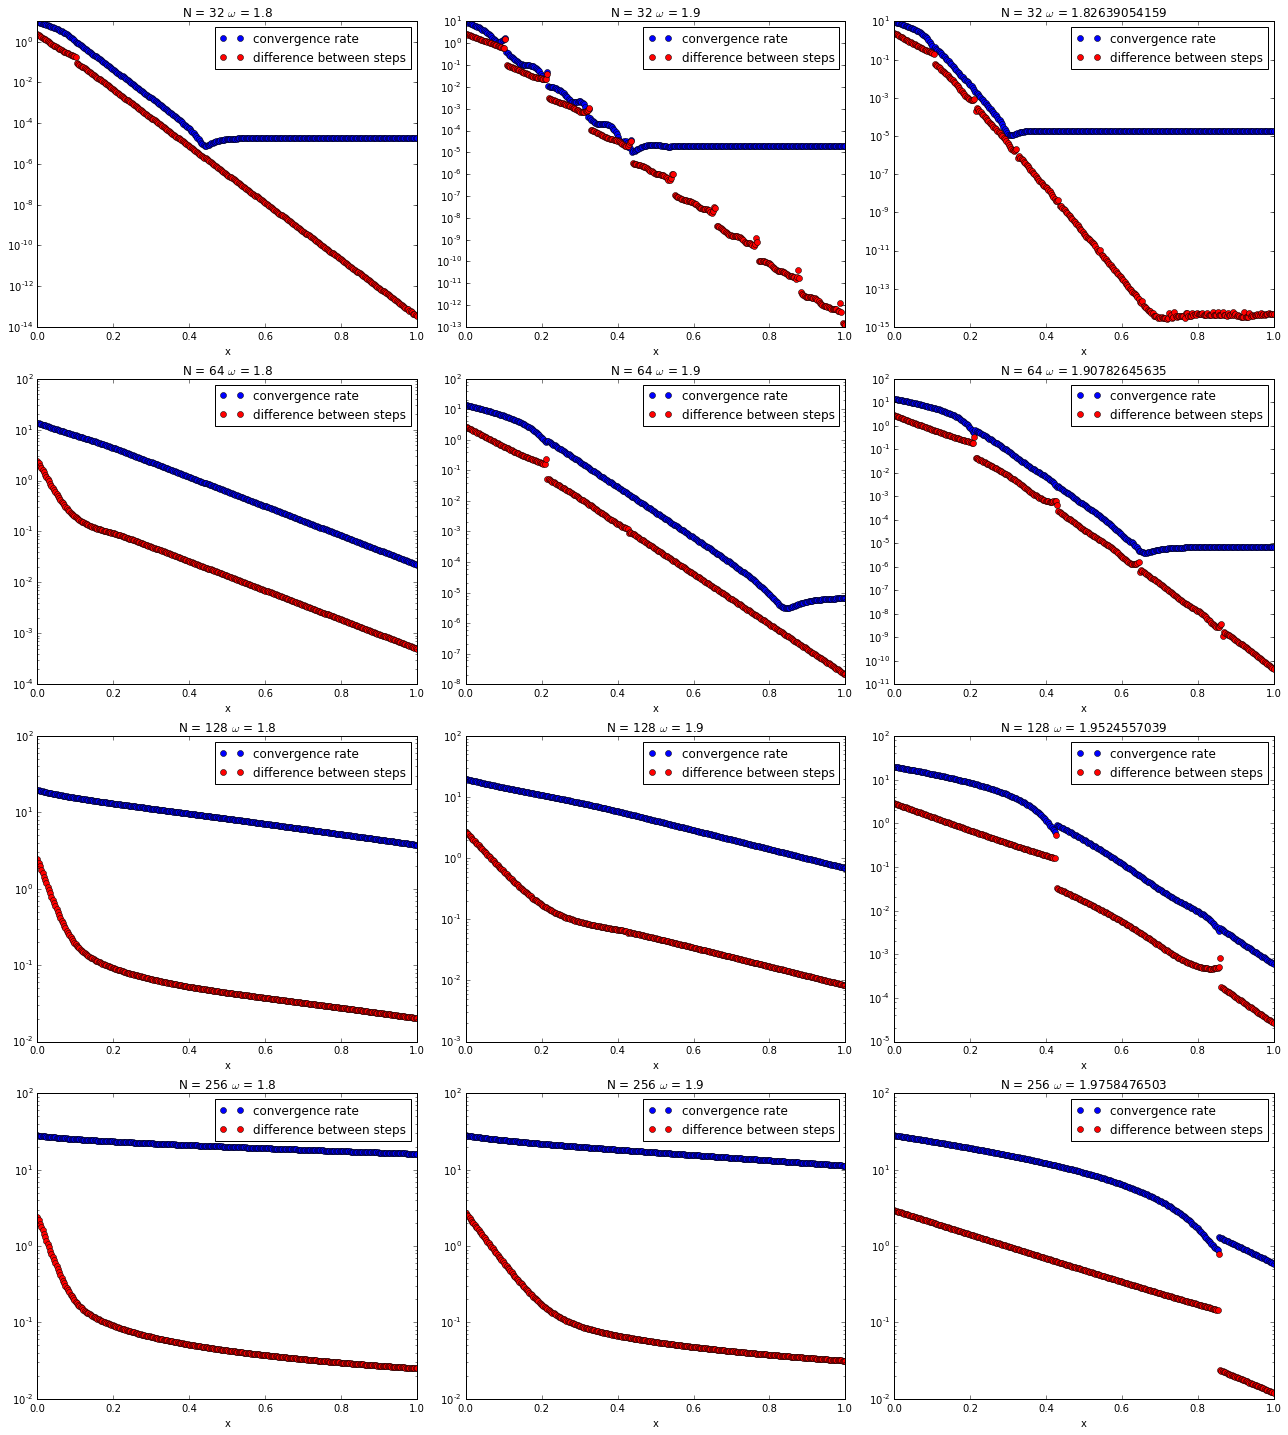

In [2]:
### INSERT CODE HERE
# Problem setup
f = lambda x: -numpy.sin(x)
u_true = lambda x: numpy.sin(x) + (3.0 - numpy.sin(1.0)) * x

# Descretization
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
x_bc = numpy.linspace(a, b, 300)
difference_step = numpy.linspace(a, b, 299)
omega_opt = lambda N: 2.0 / (1.0 + numpy.sin(numpy.pi * ((b - a) / (N + 1))))

def BVP_solve(N, omega, a, b, u_a, u_b): 
    """BVP_solve uses a second-order, centered difference method with given N and solve the resulting system
    of equations using the SOR method.
    
    Input:
    -N: the given list of different numbers of points.
    -omega: omega
    -a: boundary point
    -b: boundary point
    -u_a: boundary value at boundary a
    -u_b: boundary value at boundary b
    
    Output:
    -convergence SOR: convergence rate to the true solution in the L2 norm of the ODE
    -difference: difference between subsequent steps of the iteration count.
    """
    
    x_bc = numpy.linspace(a, b, N + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (N + 1)
    
    # Construct matrix A
    A = numpy.zeros((N, N))
    diagonal = numpy.ones(N) / delta_x**2
    A += numpy.diag(diagonal * -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)

    # Construct RHS
    b = f(x)
    b[0] -= u_a / delta_x**2
    b[-1] -= u_b / delta_x**2

    # Solve system
    # Initial guess for iterations
    U = numpy.zeros(N + 2)
    U[0] = u_a
    U[-1] = u_b

    convergence_SOR = numpy.zeros(300)
    difference = numpy.zeros(299)
    
    #calculate convergence rate and difference
    for k in xrange(300):
        for i in xrange(1, N + 1):
            U_gs = 0.5 * (U[i-1] + U[i+1] - delta_x**2 * f(x_bc[i]))
            U[i] += omega * (U_gs - U[i])

        convergence_SOR[k] = numpy.linalg.norm(u_true(x_bc) - U, ord=2)
        if k > 0:
            difference[k-1] = numpy.linalg.norm(U - U_laststep, ord = 2)
        U_laststep = U.copy()
        
    return convergence_SOR, difference

# Plot result
N = [32, 64, 128, 256]
omega = [1.8, 1.9, 0.0]

fig = plt.figure()
fig.set_figheight(fig.get_figheight()*5)
fig.set_figwidth(fig.get_figwidth()*3)
k = 1.0
for i in N:
    #calculate optimal omega and add it to the omega list
    omega_add = omega_opt(i)
    omega[2] = omega_add
    for j in omega:
        convergence, difference = BVP_solve(i, j, a, b, u_a, u_b)
        axes = fig.add_subplot(4, 3, k)
        axes.semilogy(x_bc, convergence, 'bo', label = "convergence rate")
        axes.semilogy(difference_step, difference, 'ro', label="difference between steps")
        axes.legend(loc = 1)
        axes.set_title("N = %s $\omega$ = %s" %(i, j))
        axes.set_xlabel("x")
        k = k+1
        
plt.tight_layout()


**Graph Description**

U| $\omega$ = 1.8 | $\omega$ = 1.9 | $\omega_{opt}$
-|----------------|----------------|---------------
U=32|||
U=64|||
U=128|||
U=256|||

**(b)** [5] Describe what you observe from part (a).  Please comment on the following
1. Comment on the convergence rates, how steady are they (are the slopes constant).
2. Compare the optimal value of $\omega$ vs. the others.
3. Why do you suppose those kinks in some of the convergence rates are happening?
4. Describe and explain the different behavior between the convergences we plotted in each plot.
5. For the $N = 32$ case why does the error convergence stall?

**Answer**

**(1)**

They're not steady. As shown on the graphs, the slopes are not constant in some cases:

When N = 32, the convergence rate goes down to a certain point, it goes horizontal no matter what $\omega$ is.

When N = 64, the convergence rate steady when $\omega$ is 1.8. In the other two cases, the slope is not constant.

When N = 128, the convergence rate is not steady when $\omega$ is optimal.

When N = 256, the convergence rate is not steady when $\omega$ is optimal.

**(2)**

When N = 32, the optimal value of $\omega$ is between 1.8 and 1.9

When N = 64, the optimal value of $\omega$ is bigger than 1.9

When N = 128, the optimal value of $\omega$ is bigger than 1.9

When N = 256, the optimal value of $\omega$ is bigger than 1.9

Also, when N is bigger, the optimal value of $\omega$ is bigger.

**(3)**

As we can see, the kinks happen in every $\omega_{opt}$ graph. Usually, with that kink, we can see the difference between subsquence steps also have kinks at same x. With different N, the kink happens at different x. Generally, when N is bigger, the x that kinks happen is bigger. Another observation is when $\omega = 1.8$, there is no kinks no matter what N is. Here, we might guess when $\omega$ is even, the computer can deal with it very well with finite accuracy. In the other two cases, the computer may lose accuracy when using odd or infinite decimal $\omega$ to calcualte.

**(4)**

When N is 32, the convergence rate goes from $10^1$ to $10^{-5}$, then it goes horizontal. With the optimal $\omega$, it reaches the lowest convergence rate faster than the other two. 

When N is 64, the convergence rate of $\omega = 1.8$ goes from $10^1$ to $10^{-1}$, then it goest horizontal. When $\omega = 1.9$, it has the lowest convergence rate ($10^{-6}$), the convergence rate of $\omega_{opt}$ goes down from $10^1$ to $10^{-5}$. The optimal $\omega$ is still the fast way to converge.

When N is 128, the optimal $\omega$ convergence rate goes down in all interval from $10^1$ to $10^{-4}$. However, in the other two cases, it only goes down from $10^1$ to $10^{0}$.

When N is 256, when $\omega = 1.8~or~1.9$, it goes from $10^{1.5}$ to $10^{1}$ during all interval. It goes from $10^{1.5}$ to $10^{0}$ when $\omega$ is optimal.

The difference among these convergences mainly because the how many iterations we have. The difference of $\omega$ will influence how fast the convergence goes, and sometimes the range of convergence rate.

**(5)**

Because it only has 32 iterations. After the iteration ends, it reaches the lowest convergence rate it can have. Thus, the error convergence won't change.

**End**

**(c)** [5] Let $g(\omega) = \rho(G(\omega))$ be the spectral radius of the iteration matrix $G$ for a given value of $\omega$.  Write a function that computes $g(\omega)$ for a given value of $\omega$ and $N$.

In [3]:
def g(omega, N):
    ### INSERT CODE HERE
    a = 0.0
    b = 1.0
    u_a = 0.0
    u_b = 3.0
    delta_x = (b - a) / (N + 1)
    ones = numpy.ones(N-1)
    D = -2.0 * numpy.identity(N) / delta_x**2
    L = numpy.diag(ones, -1) / delta_x**2
    U = numpy.diag(ones, 1) / delta_x**2
    
    M = (D - omega * L) / omega
    N = ((1.0 - omega) * D + omega * U) / omega
    
    G = numpy.dot(numpy.linalg.inv(M), N)
    spec_radius = numpy.max(numpy.abs(numpy.linalg.eigvals(G)))
    
    return spec_radius

In [4]:
numpy.testing.assert_allclose(0.93967633319, g(1.93967633319, 100), atol=1e-8)
print "Success!"

Success!


**(d)** [5] Plot the function $g(\omega)$ for $N = [8, 16, 32, 64, 128]$ for $\omega \in [0, 3.5]$ (you may not be able to go all the way to 0).  Also find the optimal $\omega$ using an appropriate numerical method from class to within $10^{-8}$ of the **known optimal value** and plot the minimum on your plots.  Also plot lines on your figures representing the values of $g(\omega)$ that will diverge and our theoretical range of valid $\omega$s.

min_omega:
[ 1.4902906000506531  1.6895466266955712  1.8263905450151967
  1.907826459398847   1.9524557034474079]
optimal_omega:
[ 1.4902905965657023  1.6895466227424585  1.8263905415884214
  1.9078264563457639  1.9524557039048063]


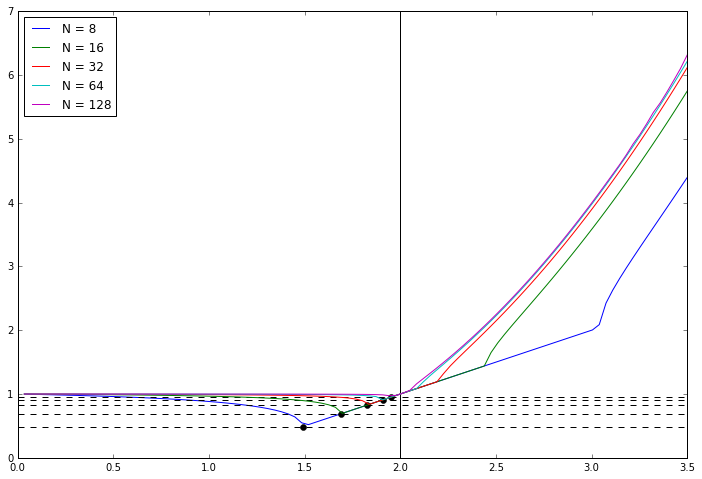

In [5]:
### INSERT CODE HERE
a = 0.0
b = 1.0
N = [8, 16, 32, 64, 128]
omega = numpy.linspace(0.0, 3.5, 100)
gx = numpy.zeros((len(N), len(omega) - 1))
g_min_omega = numpy.ones(len(N))
min_omega = numpy.ones(len(N))
optimal_omega = numpy.ones(len(N))


for (i, n) in enumerate (N): 
    #calculate optimal omega
    delta_x = (b - a) / (n + 1)
    optimal_omega[i] = 2.0 / (1.0 + numpy.sin(numpy.pi * delta_x))
    
    for (j, omegan) in enumerate (omega[1:]):
        gx[i, j] = g(omegan, n)
    
    #Golden search to find minimum point
    phi = (numpy.sqrt(5.0) - 1.0) / 2.0

    TOLERANCE = 1e-8
    MAX_STEPS = 100
    
    x = [omega[1], None, None, omega[-1]]
    x[1] = x[3] - phi * (x[3] - x[0])
    x[2] = x[0] + phi * (x[3] - x[0])
    success = False
    for k in xrange(1, MAX_STEPS + 1):

        f_1 = g(x[1], n)
        f_2 = g(x[2], n)

        if f_1 < f_2:
            x[3] = x[2]
            x[2] = x[1]
            x[1] = x[3] - phi * (x[3] - x[0])
        else:
            x[0] = x[1]
            x[1] = x[2]
            x[2] = x[0] + phi * (x[3] - x[0])

        if numpy.abs(x[3] - x[0]) < TOLERANCE:
            success = True
            break
    min_omega[i] = (x[3] + x[0]) / 2.0
    g_min_omega[i] = g(min_omega[i], n)

#print
print "min_omega:"
print min_omega
print "optimal_omega:"
print optimal_omega

#plot the graph
fig = plt.figure()
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
axes = fig.add_subplot(1, 1, 1)
axes.plot(omega[1:], gx[0,:], label = "N = 8")
axes.plot(min_omega, g_min_omega, 'ko')
for i in g_min_omega:
    axes.plot((0.0, 3.5), (i, i), 'k--')
axes.plot((2, 2), (0, 7), 'k')
axes.plot(omega[1:], gx[1,:], label = "N = 16")
axes.plot(omega[1:], gx[2,:], label = "N = 32")
axes.plot(omega[1:], gx[3,:], label = "N = 64")
axes.plot(omega[1:], gx[4,:], label = "N = 128")
axes.legend(loc = 2)
plt.show()

**(e)** [5] Comment on what you observe and interpret the changes in the function $g(\omega)$, especially for $\omega > 2$.

**Answer**

(1)As we can see from the graph, and from the results we printed, the optimal omega value is the minimum omega value for each N.

(2) Once the omega value reaches its minimum point, $g(\omega)$ increase very fast, especial when $\omega > 2$.

(3) When N is bigger, the minimum (optimal) omega value is bigger.

(4) For N = 8, the $g(\omega)$'s slope becomes even more vertical when $\omega > 3$

**End**

## Question 2

Consider the third order initial value problem
$$
    \begin{split}
    &v'''(t) + v''(t) + 4v'(t) + 4v(t) = 4t^2 + 8t - 10,\\
    &v(0) = -3,\quad v'(0) = -2,\quad v''(0) = 2.
    \end{split}
$$

**(a)** [5] Verify that the function
$$
v(t) = -\sin(2t) + t^2 - 3
$$
is a solution to this problem.  How do you know it is the unique solution?

**Answer**

To verify the function $ v(t) = -\sin(2t) + t^2 - 3$ is a solution, we plug it into the original ODE and get:

$$
(-\sin(2t) + t^2 - 3)''' + (-\sin(2t) + t^2 - 3)'' + 4(-\sin(2t) + t^2 - 3)' + 4(-\sin(2t) + t^2 - 3) = 8\cos(2t) + 4\sin2t + 2 + (-8\cos(2t) + 8t) + (-4\sin(2t) + 4t^2 - 12) = 4t^2 + 8t - 10
$$

Thus, we've verified the function is a solution to this problem.

Since the coefficients of $v''', v'', v' ~~and~~ v$ are continuous and $4t^2 + 8t - 10$ is also continuous functions of t on interval I and $1 \neq 0$ on I, thus, the solution is unique.

**End**

**(b)** [5] Rewrite this problem as a first order system of the form $u'(t) =
f(u(t), t)$ where $u(t) \in \mathbb{R}^3$.  Make sure you also specify the
initial condition $u(0) = \eta$ as a 3-vector.

**Answer**

$$\vec{u} = \begin{bmatrix} v \\ v' \\ v'' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \end{bmatrix}$$
   
$$\frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \\ u_3 \end{bmatrix} = \begin{bmatrix} u_2 \\ u_3 \\4t^2 + 8t - 10 - 4u_1 - 4u_2 - u_3 \end{bmatrix} = \vec{f}(t, \vec{u})$$

with 

$$\vec{u}(0) = \begin{bmatrix} -3 \\ -2 \\ 2 \end{bmatrix}$$

**End**

**(c)** [7] Write a function `solve_AB4` that solves the ODE using a 4-step Adams-Bashforth method over the time interval $0\leq t \leq 10$.  Make sure to use an appropriate method to startup the method.  The function should take as arguments the number of time points $N$ (which includes the initial time and final time) and the initial condition $\eta$.  Return the vector of time points $t$ and the solution $U$.

In [6]:
def f(t, u):
    return numpy.array([u[1], u[2], 4.0 * t**2 + 8.0 * t -10.0 - 4.0 * u[0] - 4.0 * u[1] - u[2]])
def solve_AB4(N, eta):
    ### INSERT CODE HERE
    """This function takes as arguments the number of time points N and initial condition,
    return the vector of time points t and the solution u_ab4.
    
    Input:
    -N: the number of time points N (which includes the initial time and final time)
    -eta: the initial condition
    
    Output:
    -t: the vector of time points
    -u_ab4: the solution
    """

    t = numpy.linspace(0.0, 10, N)
    delta_t = t[1] - t[0]
    u_ab4 = numpy.empty((3, N))
    u_ab4[:, 0] = eta

    #RK4 start the method
    for (n, t_n) in enumerate(t[0:3]):
        y_1 = u_ab4[:, n]
        y_2 = u_ab4[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_1)
        y_3 = u_ab4[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
        y_4 = u_ab4[:, n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
        u_ab4[:, n+1] = u_ab4[:, n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))

    #4 step Adams-Bashforth
    for n in xrange(0,len(t)-4):
        u_ab4[:, n+4] = u_ab4[:, n + 3] + delta_t * (-9.0*f(t[n], u_ab4[:, n]) + 37.0 * f(t[n+1], u_ab4[:, n+1]) - 59.0*f(t[n+2], u_ab4[:, n+2]) + 55.0*f(t[n+3], u_ab4[:, n+3])) / 24.0 
    
    return t, u_ab4

In [7]:
t, U = solve_AB4(200, [-3.0, -2.0, 2.0])
print "Largest error = %s " % numpy.linalg.norm(-numpy.sin(2.0 * t) + t**2 - 3.0 - U[0, :], ord=numpy.infty)
numpy.testing.assert_allclose(U[0, :], -numpy.sin(2.0 * t) + t**2 - 3.0, rtol=1e-8, atol=1e-3)
print "Success!"

Largest error = 0.000732841174667 
Success!


**(d)** [7] Implement a function similar to part (c) but use a 3-step Adams-Bashforth-Moulton predictor/corrector method (3 step methods for both the predictor and corrector).

In [8]:
def f(t, u):
    return numpy.array([u[1], u[2], 4.0 * t**2 + 8.0 * t -10.0 - 4.0 * u[0] - 4.0 * u[1] - u[2]])
def solve_ABM3(N, eta):
    """This function takes as arguments the number of time points N and initial condition,
    return the vector of time points t and the solution u_abm3.
    
    Input:
    -N: the number of time points N (which includes the initial time and final time)
    -eta: the initial condition
    
    Output:
    -t: the vector of time points
    -u_abm3: the solution
    """
    
    t = numpy.linspace(0, 10, N)
    delta_t = t[1] - t[0]
    u_abm3 = numpy.empty((3, N))

    # Use RK-4 to start the method
    u_abm3[:, 0] = eta
    
    for (n, t_n) in enumerate(t[0:2]):
        y_1 = u_abm3[:, n]
        y_2 = u_abm3[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_1)
        y_3 = u_abm3[:, n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
        y_4 = u_abm3[:, n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
        u_abm3[:, n+1] = u_abm3[:, n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))


    for n in xrange(0,N-3):
        #3-step AB as the predictor
        u_abm3[:, n+3] = u_abm3[:, n + 2] + delta_t / 12.0 * (5.0*f(t[n], u_abm3[:, n]) - 16.0 * f(t[n+1], u_abm3[:, n+1]) + 23.0 * f(t[n+2], u_abm3[:, n+2]))
        #3-step AM as the corrector
        u_abm3[:, n+3] = u_abm3[:, n + 2] + delta_t / 24.0 * (f(t[n], u_abm3[:, n]) - 5.0 * f(t[n+1], u_abm3[:, n+1]) + 19.0 * f(t[n+2], u_abm3[:, n+2]) + 9.0 * f(t[n+3], u_abm3[:, n+3]))

    return t, u_abm3

In [9]:
t, U = solve_ABM3(200, [-3.0, -2.0, 2.0])
print "Largest error = %s " % numpy.linalg.norm(-numpy.sin(2.0 * t) + t**2 - 3.0 - U[0, :], ord=numpy.infty)

numpy.testing.assert_allclose(U[0, :], -numpy.sin(2.0 * t) + t**2 - 3.0, rtol=1e-8, atol=1e-3)

print "Success!"

Largest error = 0.000269758063624 
Success!


**(e)** [6] Plot the convergence for each of your implemented methods and comment on their convergence rates.

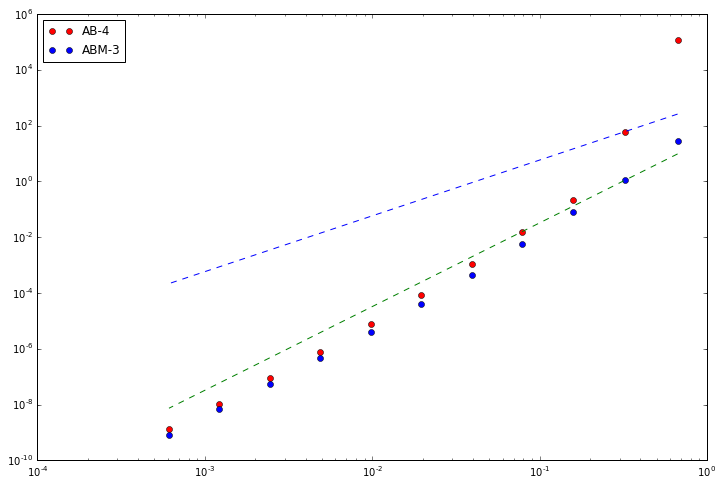

In [10]:
### INSERT CODE HERE
#plot AB-4 convergence rate:



num_steps = [2**n for n in xrange(4,15)]

delta_t = numpy.empty(len(num_steps))
error_ab = numpy.empty(len(num_steps))
error_am = numpy.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t_n = numpy.linspace(0, 10, N)
    delta_t[i] = t_n[1] - t_n[0]
    u_exact = lambda t_n: -numpy.sin(2.0 * t_n) + t_n**2 - 3.0
    
    t, u_ab4 = solve_AB4(N, [-3.0, -2.0, 2.0])
    ab = u_ab4[0,:]
    t, u_abm3 = solve_ABM3(N, [-3.0, -2.0, 2.0])
    abm = u_abm3[0, :]
    error_ab[i] = numpy.linalg.norm(delta_t[i] * (ab - u_exact(t)), ord=1)
    error_am[i] = numpy.linalg.norm(delta_t[i] * (abm - u_exact(t)), ord=1)
    

fig = plt.figure()
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_t, error_ab, 'ro', label='AB-4')
axes.loglog(delta_t, error_am, 'bo', label="ABM-3")
axes.legend(loc = 2)
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_t, order_C(delta_t[1], error_ab[1], 2.0) * delta_t**2.0, '--b')
axes.loglog(delta_t, order_C(delta_t[1], error_am[1], 3.0) * delta_t**3.0, '--g')


plt.show()

**Answer**

As we can see, they have similar convergence order and the convergence order follows the third order.

**End**

## Question 3

Determine the coefficients $\beta_0,~\beta_1,~\beta_2$ for the third
order, 2-step Adams-Moulton method.  We will do this two different ways:

**(a)** [10] Using the general expression for the local truncation error for multi-step methods
$$
    \tau^{n + r} = \frac{1}{\Delta t} \left (\sum^r_{j=0} \alpha_j u(t_{n+j}) - \Delta t \sum^r_{j=0} \beta_j f(u(t_{n+j})) \right ).
$$
Note that $\alpha_0 = 0$, $\alpha_1 = -1$, and $\alpha_2 = 1$.

**Answer**

From the lecture notes, we have:

>Using the general expansion and evalution of the Taylor series about $t_n$ we have
>$$\begin{aligned}
    u(t_{n+j}) &= u(t_n) + j \Delta t u'(t_n) + \frac{1}{2} (j \Delta t)^2 u''(t_n) + \mathcal{O}(\Delta t^3) \\
    u'(t_{n+j}) &= u'(t_n) + j \Delta t u''(t_n) + \frac{1}{2} (j \Delta t)^2 u'''(t_n) + \mathcal{O}(\Delta t^3)
\end{aligned}$$
leading to
>$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u_{n+j} + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
&~~~~~~~+ \cdots + \Delta t^{q - 1} \left (\frac{1}{q!} \left(j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}$$

>The method is *consistent* if the first two terms of the expansion vanish, i.e. $\sum^r_{j=0} \alpha_j = 0$ and >$\sum^r_{j=0} j \alpha_j = \sum^r_{j=0} \beta_j$.

From the hint above, we can construct several equations to help us find $\beta_0$, $\beta_1$ and $\beta_2$.

Here, we have:

$\alpha_0 = 0$, $\alpha_1 = -1$, $\alpha_2 = 1$

which meets the equation $$\alpha_0 + \alpha_1 + \alpha_2 = 0$$

To let method be consistent, the first several terms of the expansion should vanish. From which, we can say:

$$\alpha_0 + \alpha_1 + \alpha_2 = 0$$

$$0\alpha_0 + 1\alpha_1 + 2\alpha_2 = \beta_0 + \beta_1 + \beta_2$$

$$\frac{1}{2} 0\alpha_0 + \frac{1}{2} 1 \alpha_1 + \frac{1}{2} 4 \alpha_2 = 0 \beta_0 + 1 \beta_1 + 2 \beta_2$$

$$\frac{1}{6} 0 \alpha_0 + \frac{1}{6} 1 \alpha_1 + \frac{1}{6} 8 \alpha_2 = 0 \beta_0 + \frac{1}{2} \beta_1 + 2 \beta_2$$

Solve the equations above, which bring us the $\beta_s$:

$$\beta_0=-\frac{1}{12},\beta_1=\frac{8}{12},\beta_2=\frac{5}{12}$$

**End**

**(b)** [10] Using the relation
$$
    u(t_{n+2}) = u(t_{n+1}) + \int_{t_{n+1}}^{t_{n+2}}\,f(u(s))\,ds.
$$
Interpolate  a quadratic polynomial $p(t)$ through the three values $f(U^n),~f(U^{n+1})$ and $f(U^{n+2})$ and then integrate this polynomial exactly to obtain the formula.  The coefficients of the polynomial will depend on the three values $f(U^{n+j})$.   It's easiest to use the "Newton form" of the interpolating polynomial and consider the three
times $t_n=-\Delta t$, $t_{n+1}=0$, and $t_{n+2}=\Delta t$ so that $p(t)$ has the form
$$
    p(t) = A + B(t+\Delta t) + C(t+\Delta t)t
$$
where $A,~B$, and $C$ are the appropriate divided differences based on the data.  Then integrate from $0$ to $\Delta t$.   (The method has the same coefficients at any time, so this is valid.)

**Answer**

To use the "Newton form" of the interpolating polynomal to find the coefficients of 3 order, 2-step Adams-Moulton method, we have 

$$p(s) = \sum^2_{l=0}\left(\prod_{j=0,j\neq l}^2 \frac{s-t_{k+1-j}}{t_{k+1-l}-t_{k+1-j}} \right )f(t_{k+1-l}, y_{k+1-l})$$

and $$y_{k+1} = y_k + h\sum^2_{l=0} \beta_l f(t_{k+1-l}, y_{k+1-l})$$

(h = $\Delta x$)

here, $$\beta_l = \frac{1}{h}\int_{t_k}^{t_{k+1}}\left(\sum^2_{j=0,j\neq l} \frac{s-t_{k+1-j}}{t_{k+1-l}-t_{k+1-j}}\right )ds $$

Thus, we have:

$$y_{k+1} = y_k + h[\beta_2f(t_{k+1},y_{k+1}) + \beta_1f(t_k, y_k) + \beta_0f(t_{k-1}, y_{k-1})]$$

here, we have:

$$\beta_2 = \frac{1}{h}\int_{t_k}^{t_{k+1}}\frac{s-t_k}{t_{k+1}-t_k}\frac{s-t_{k-1}}{t_{k+1}-t_{k-1}}ds$$

$$\beta_1 = \frac{1}{h}\int_{t_k}^{t_{k+1}}\frac{s-t_{k+1}}{t_{k}-t_{k+1}}\frac{s-t_{k-1}}{t_{k}-t_{k-1}}ds$$

$$\beta_0 = \frac{1}{h}\int_{t_k}^{t_{k+1}}\frac{s-t_{k+1}}{t_{k-1}-t_{k+1}}\frac{s-t_{k}}{t_{k-1}-t_{k}}ds$$

To solve this problem easier, we change the interval to $[0, \Delta x]$, and use $\Delta x$ to represent the difference between $t_{k-1}$, $t_k$, $t_{k+1}$.

for example, 

$$\beta_2 = \frac{1}{2h^3}\int_0^h(u-0)(u+h)du = \frac{5}{12}$$

$(u = s-t_k)$

Hence, we get $$\beta_2 = \frac{5}{12}, \beta_1 = \frac{8}{12} ~and~ \beta_0 = -\frac{1}{12}$$

**End**

## Question 4

A simplification of Gaussian elimination and $LU$ factorization, known as **Cholesky factorization**, comes about when the matrix in question is **symmetric** if $A \in \mathbb R^{m \times m}$ or **hermitian** when $A \in \mathbb C^{m \times m}$.

**(a)** [5 points] In the case where the matrix is $A \in \mathbb R^{2 \times 2}$ and symmetric what would happen if we tried to $LU$ factorize $A$ in the form
$$
    A = \begin{bmatrix}
        A_{11} & k \\
        k & A_{22}
        \end{bmatrix}?
$$

**Answer**

If we want to LU factorize A in the form 
$$
    A = \begin{bmatrix}
        A_{11} & k \\
        k & A_{22}
        \end{bmatrix}
$$

we have 
$$
    L = \begin{bmatrix}
        l_{11} & 0 \\
        l_{21} & l_{22}
        \end{bmatrix}
$$
$$
    U = \begin{bmatrix}
        u_{11} & u_{12} \\
        0 & u_{22}
        \end{bmatrix}
$$

In this case, $l_{11} = u_{11}$, $l_{22} = u_{22}$, $l_{21}l_{11} = k$ and $l_{11}u_{12} = k$.

Thus, we have:

$$
    L = \begin{bmatrix}
        \sqrt{A_{11}} & 0 \\
        \frac{k}{\sqrt{A_{11}}} & \sqrt{A_{22} - \frac{k^2}{A_{11}}}
        \end{bmatrix}
$$

$$
    U = \begin{bmatrix}
        \sqrt{A_{11}} & \frac{k}{\sqrt{A_{11}}} \\
        0 & \sqrt{A_{22} - \frac{k^2}{A_{11}}}
        \end{bmatrix}
$$

And, we found that $L^T = U$. 

Therefore, $A = LL^T$

**End**

**(b)** [5 points] Proceeding from part (a) Cholesky factorization then zeros the remaining entry above the diagonal.  What are the forms of the matrices given our previous $A$ so that we can write $A$ as $A = R^T D R$ where $D$ is a diagonal matrix and $R$ is upper triangular?

**Answer**

In order to write A as $A = R^TDR$, where D is the diagonal matrix. We can write matrix D as:
$$
    D = \begin{bmatrix}
        A_{11} & 0 \\
        0 & A_{22} - \frac{k^2}{A_{11}}
        \end{bmatrix}
$$

Then, we can write matrix R as:
$$
    R = \begin{bmatrix}
        1 & x \\
        0 & 1 
        \end{bmatrix}
$$

Then, we solve x after we calcualte $A = R^TDR$:

$$x = \frac{k}{A_{11}}$$

Therefore, we have:

$$
    R = \begin{bmatrix}
            1 & \frac{k}{A_{11}} \\
            0 & 1 
            \end{bmatrix}
$$

**End**

**(c)** [5 points] Generalizing this procedure we can write the Cholesky factorization as a sequence of matrices
$$
    A = \underbrace{R_1^T R_2^T \cdots R_{m-1}^T R_{m}^T}_{R^T} \underbrace{R_m R_{m-1} \cdots R_2 R_1}_{R}.
$$
In the end the pseudo-code looks like
```
R = A
for k = 1 to m
    for j = k + 1 to m
        R[j, j:m] = R[j, j:m] - R[k, j:m] R[k, j] / R[k, k]
    R[k, k:m] = R[k, k:m]/sqrt(R[k,k])
```
Implement this factorization noting that this only transforms the upper triangular part of the matrix into the correct factor (i.e. zero out the lower triangular part of the matrix).

In [11]:
def cholesky_factorization(A):
    ### INSERT CODE HERE
    R = A.copy()
    m = A.shape[0]
    for k in range(0, m):
        for j in range(k+1, m):
            R[j, j:m] = R[j, j:m] - R[k, j:m]*R[k, j] / R[k, k]
        R[k, k:m] = R[k, k:m]/numpy.sqrt(R[k, k])  
    for k in range(1,m):
        R[k, 0:k] = 0.0

    return R

In [12]:
N = 10
A = numpy.random.normal(size=(N, N))
A = numpy.dot(A.transpose(), A)
R_n = numpy.linalg.cholesky(A).transpose()
R = cholesky_factorization(A)
numpy.testing.assert_allclose(R_n, R)
print "Success!"

Success!


**(d)** [5 points] Write a function that uses a Cholesky factorization and the appropriate substitution algorithm to solve $Ax = b$.

In [13]:
def solve_cholesky(A, b):
    ### INSERT CODE HERE
    R = cholesky_factorization(A)
    L = R.transpose()
   
    y = numpy.zeros(b.shape)
    x = numpy.zeros(b.shape)
    m = len(y)

    for k in range(m):
        y[k] = (b[k] - numpy.dot(L[k,0:k], y[0:k]))/L[k,k]
        
    x[-1] = y[-1]/R[-1,-1]
    for k in range(m-1,-1,-1):
        x[k] = (y[k]-numpy.dot(R[k,k+1:],x[k+1:])) / R[k,k]
    
    return x

In [14]:
N = 10
A = numpy.random.normal(size=(N, N))
b = numpy.random.normal(size=N)
A = numpy.dot(A.transpose(), A)
x = solve_cholesky(A, b)
numpy.testing.assert_allclose(x, numpy.linalg.solve(A, b))
print "Success!"

Success!
